# AD Gym: PID Synthesis Notebook

## Description

This notebook is intended to support you with tuning a PID controller for the autonomous vehicle to drive at the recommended speed (i.e., cruise control) and to follow the line (i.e., lane keeping).

This is a long notebook so be sure to:
* **Navigation:** Use the "table of contents" options on the left side to assist with navigating (≡).
* **Editing guidance:** Read the next sub-section that explains which parts of the notebook are critical for you to edit.

## **Editing guidance**

The frequently asked question that this "editing guidance" is answering is:

**"Which parts of the notebook should I change? Because sometimes it feels like there are 10-20 critical lines of code to changes out of >1000 lines of code!"**

We fully appreciate and agreed with the sentiment of this FAQ! Hence, the following is the list of sections within this notebook that are critical for you to edit so that you gain the intended experiece with PID synthesis and evaluation.

**Note:** working through the whole notebook is still relevant for your understanding (even though you do not need to edit the parts not listed below)!

**Note:** The (link to section) hyperlink may not work if your colab assigns a different id to the section.

\

### **Specify the vehicle paramters** ([link to section](#scrollTo=KdUyqNCx2dvg))
The vehicle parameters in this section model a Telsa Model 3 (i.e., a full-sized passenger vehicle).
* You should **NOT** edit the parameter values in this section.
* You should read this section for the names and descriptions of the vehicle parameters.
* The section that you **SHOULD** edit is the "..." section. In that section you evaluate the performance of your PID policies over a range of uncertainties.
* The parameters that you should consider adjusting in the evaluation over uncertainties are one (or more) of the following:
  * `m` (the mass of the car)
  * `delta_offset` (the steering misalignment of the front wheel);
  * `Lf` or `Lr` (the lengths of the car from the center of gravity to the front and rear wheels respectively).

\

### **Specify the road** [(link to section)](#scrollTo=EZvLBp0Y2oca)
You **SHOULD** redefine the road in this section to take the following into account:

* When using hand-tuning, it is fine to synthesize and evaluate a PID policy using just one road, because hand-tuning PID policy does not really have a notion of training versus validation.
* You should think of the road you define as being an evaluation road that contains many key aspects for testing the limits of your PID policy.
* Some key aspects to consider:
  * A range of curvatures in both directions (i.e., tight curves; gentle curves; and some inbetween).
  * A range of speed limit changes both up and down (i.e., large changes from high-speed to low-speed and from low-speed to high-speed; smaller changes of 10 to 30 km/h).
  * A range of challenging sequences of road element (e.g., a high speed straight into a very tight curve; a gentle curve into a tight curve of the same direction (and of the opposite direction); a sequence of tight curves across a range of radii of say 20 to 50 meters.

\

### **Specify the Observation Parameters** ([link to section](#scrollTo=UB-aBfdd20iz))
You **SHOULD**:

* Select which of the possible observations are actually available to the policy (i.e., with the `obs` flag); and
* Ensure the rest of the possible observations are turned off (i.e., with the `info` flag)
* Take note of whether the observations that you selected have a `_stddev` parameter (i.e., the standard deviation of noise that is added to the observation).
* If there is a `_stddev` parameter, then you should consider this as a possible parameters to adjust in the "..." section where you perform an evaluation over uncertainties.
* Some description is given in this section about:
  * The "minimum" observations necessary; and
  * The option of adding look-ahead information.

\

### **PID Policy Class** ([link to section](#scrollTo=MGVOSHdzM1n0))

You **SHOULD**:

* Read this whole `PIDPolicy` class to understand its structure and parameters.
* If you choose to change the observations (see above), then you need to also change the `compute_action()` function of the `PIDPolicy` class to use the available observations.
  * For example, if you add a `look_ahead_recommended_speed` observation, then you need to adjust the `compute_action()` so that the policy reduces the car's speed before it reaches an upcoming road element with a reduce recommeded speed.

\

### **One-time evaluation the PID Policy to test the workflow** ([link to section](#scrollTo=Oo4LTUy97rHj))

You **SHOULD**:

* Edit the `kp_cc` and `kp_lk` parameters (i.e., the proportional gains for the cruise control and lane keeping respectively) in the following line of code:
``` Python
pid_policy = PIDPolicy(kp_cc=5.0, ki_cc=0.0, kd_cc=0.00, kp_lk=0.1, ki_lk=0.0, kd_lk=0.00, Ts=numerical_integration_parameters["Ts"])
```
* The goal is to find a proportional gains that are a good starting point for the hand-tuning process of the subsequent section.

\

### **Animate the time series results** ([link to section](#scrollTo=HImev9MTHl-h))

You **SHOULD**:

* Uncomment the displaying of the animation, which is this line of code:
``` Python
HTML(ani.to_jshtml())
```
* Watch the animation once to see what additional perspective it gives to you compared to a plot of the time-series data.
* Consider again commenting out the animation display because it can take a while to run.
* It you wish to save a copy of the animation, uncomment the save commands for the format you want (gif, mp4, or webm).

\

### **Tune the Lane Keeping PID Policy** ([link to section](#scrollTo=ab1wQIN8Ulj-))

You **SHOULD**:

* Work through the steps to tune the lane-keeping policy for the road that you have defined.
* Repeat this hand-tuning process for the cruise-control policy (by copying the code and adjusting it to be for the speed of the car).

\

### **Tune the Cruise Control PID Policy** ([link to section](#scrollTo=kg9vJmDoj0b-))

You **SHOULD**:

* Use the "Tune the Lane Keeping PID Policy" section as a template for tuning a cruise control PID policy.

\

### **Performance Metrics** ([link to section](#scrollTo=T16GbUkaXMsB))

You **SHOULD**:

* Edit the `compute_performance_metrics_from_time_series()` function in the sub-section "Define a Performance Metric Function per simulation time series" ([link to sub-section](#scrollTo=2xUVS2td6pXX)) to:
  * Remove the performance metric equations that are implemented there.
  * Implement the equations that you have defined as your performance metrics.

* Edit the `performance_metrics_over_uncertainties()` function in the sub-section "Define function to compute the Performance Metrics over uncertainties" ([link to sub-section](#scrollTo=AtJ-W5trz5Rw)) to:
  * Adjust the range and quantity of uncertainties that you choose to consider.
  * Remember to write down a justification for the source of uncertainty that you choose to consider, and for the range of values you use for each uncertainty.
  * As thse computation of `performance_metrics_over_uncertainties()` can take a long time, it is reasonable to:
    * **During policy synthesis** use fewer values for each uncertainty, which speeds up computations..
    * **During "final evaluation** use more values for each uncertainty, which gives a more thorough (and ethically appropriate) evaluation when comparing the performance of multiple policies.

* Edit the sub-section "Process the Performance Metrics over uncertainties" ([link to sub-section](#scrollTo=jnCOeTNfRTMf)) to:
  * Appropriately compute a single value for each Performance Metric that takes into account the multiple simulations from the previous step.

\

### **Evaluate multiple policies against the performanc metrics and identify the Pareto front** ([link to section](#scrollTo=l6KioMblSTni))

You **SHOULD**:

* Define a separate road for this "final" evaluation that has the same range of features as the road used for tuning (but different values and ordering).
* Complete tuning of both the lane-keeping and cruise-control policies before editing this section.
* Be purposeful in your choice about how you synthesise multiple policies to compare, and explain the resoning for our choice.
* One example for synthesizing multiple policies, which is sufficient for the Upskilling assignment, is to:
  * Complete the tuning for a sinlge lane-keeping and cruise-control PID policy (as per the relevant sections of this notebook).
  * Generate multiple policies by perturbing the gains of the PID policies.
    * For example, evaluate all combinations of adjusting the proportional gains by {-10%, unchanged, +10%} (i.e., the 9 combination of multiplying the `kp_lk` and `kp_cc` gains by {0.9, 1.0, 1.1}).

\

# Dependencies (install and clone)

In [1]:
!pip install -q gymnasium
#!pip install -q stable_baselines3

In [2]:
%cd /content
%rm -rf ai4r-gym
!git clone https://gitlab.unimelb.edu.au/ai4r/ai4r-gym.git

/content
Cloning into 'ai4r-gym'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 295 (delta 119), reused 20 (delta 10), pack-reused 64 (from 1)
Receiving objects: 100% (295/295), 879.73 KiB | 326.00 KiB/s, done.
Resolving deltas: 100% (142/142), done.


In [3]:
%cd /content/ai4r-gym
%pwd
!git status

/content/ai4r-gym
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


## Library Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

#from stable_baselines3 import PPO, SAC, DDPG

import ai4rgym

from utils import ensure_dir, ensure_dirs
#from utils import eval_model, evaluate_policy
#from utils import plot_rewards, plot_and_animate_trajectory

# Specify the Vehicle Parameters

Dictionary with car specifications, in the form of a dynamic bicycle model.

**IMPORTANT NOTE:**

* The steering offset parameter in the bicycle model is set to 2 degrees, i.e., `"delta_offset" : 2.0 * np.pi/180,`.

* This steering offset is added so that the performance of lane keeping with a proportional policy (i.e., P-only) has a steady-state offset that needs to be corrected by including an integral component in the policy.

**PARAMETER DESCRIPTIONS:**

The following list is a breif description of the vehicle parameters in the dictionary below, given in the same order that the dictionary is specified:

* `Lf`    The distance from the vehicles center of gravity to the front wheels (units: meters)
* `Lr`    The distance from the vehicles center of gravity to the rear wheels (units: meters)
* `m`     The mass of the vehicle (units: kg)
* `Iz`     The mass moments of interia of the vehicles about the vertical axis (units: kg meter^2)
* `Cm`     motor constant that convert the drive command to force applied to the wheel (units: N/"100% command")
* `Cd`     The coefficient of aerodynamic drag that opposes the direction of motion (units: Newtons / (meters/second)^2))
* `delta_offset`     The actual steering angle of the vehicle when a zero steering angle is requested (units: radians)
* `delta_request_max`     The upper limit of allowable steering angle (lower limit is taken as the negative) (units: radians)
* `Ddelta_lower_limit`     The lower limit on the allowable rate-of-change of the steering angle (units: radians / second)
* `Ddelta_upper_limit`     The upper limit on the allowable rate-of-change of the steering angle (units: radians / second)
* `v_transition_min`     The velocity below which the equations-of-motion simulate a purely kinematic model (units: m/s)
* `v_transition_max`     The velocity above which the equations-of-motion simulate a purely dynamic model (units: m/s)
* `body_len_f`     The length of the body from the center-of-gravity to the front bumper (purely for visualization) (units: meters)
* `body_len_r`     The length of the body from the center-of-gravity to the rear bumper (purely for visualization) (units: meters)
* `body_width`     The width of the body (purely for visualization) (units: meters)

\

**WHAT TO CHANGE:**

As dsecribed at the start of this notebook:

* You should **NOT** edit the vehicle parameter values in this section.
* The section that you **SHOULD** edit is the "..." section. In that section you evaluate the performance of your PID policies over a range of uncertainties.
* The vehicle parameters that you should consider adjusting as part of evaluation over uncertainties are one (or more) of the following: `m`, `delta_offset`, `Lf`, and/or `Lr`.

In [5]:
# SPECIFY THE VEHCILE PARAMETERS
bicycle_model_parameters = {
    "Lf" : 0.55*2.875,
    "Lr" : 0.45*2.875,
    "m"  : 2000.0,
    "Iz" : (1.0/12.0) * 2000.0 * (4.692**2+1.850**2),
    "Cm" : (1.0/100.0) * (1.0 * 400.0 * 9.0) / 0.2286,
    "Cd" : 0.5 * 0.24 * 2.2204 * 1.202,
    "delta_offset" : 2.0 * np.pi/180,
    "delta_request_max" : 45 * np.pi/180,
    "Ddelta_lower_limit" : -45 * np.pi/180,
    "Ddelta_upper_limit" :  45 * np.pi/180,
    "v_transition_min" : 500.0 / 3.6,
    "v_transition_max" : 600.0 / 3.6,
    "body_len_f" : (0.55*2.875) * 1.5,
    "body_len_r" : (0.45*2.875) * 1.5,
    "body_width" : 2.50,
}

# Specify the Road


Specified as a list of dictionaries, where each element in the list specifies a segment of the road. Example segment dictionaries:

* A straight element: `{"type":"straight", "length":3.0, "v_max_kph":60.0}`
* A curved element specified by angular sweep: `{"type":"curved", "curvature":1/50.0, "angle_in_degrees":45.0, "v_max_kph":60.0}`
* A curved element specified by length: `{"type":"curved", "curvature":1/50.0, "length":30.0, "v_max_kph":60.0}`

**Reminders:**
* The radius of a curved road element is in units of meters.
* The curvature of a curved road element is the inverse of the radius (hence in units of 1/meters).
* The recommended speed of a segment is automatically computed based (approximately) on the following table:

| Radius of curve (m) | Recommended speed (kph) |
|---|---|
|  <20 |  20 |
|   55 |  50 |
|  100 |  64 |
|  140 |  73 |
|  330 |  93 |
|  600 | 110 |
| >600 | 110 |

\

**WHAT TO CHANGE:**

As described at the start of this notebook, you should redefine the road in this section to take the following into account:

* When using hand-tuning, it is fine to synthesize and evaluate a PID policy using just one road, because hand-tuning PID policy does not really have a notion of training versus validation.
* You should think of the road you define as being an evaluation road that contains many key aspects for testing the limits of your PID policy.
* Some key aspects to consider:
  * A range of curvatures in both directions (i.e., tight curves; gentle curves; and some inbetween).
  * A range of speed limit changes both up and down (i.e., large changes from high-speed to low-speed and from low-speed to high-speed; smaller changes of 10 to 30 km/h).
  * A range of challenging sequences of road element (e.g., a high speed straight into a very tight curve; a gentle curve into a tight curve of the same direction (and of the opposite direction); a sequence of tight curves across a range of radii of say 20 to 50 meters.

In [6]:
road_elements_list = [
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/30.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/25.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":-1/50.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":-1/45.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/75.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/70.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":-1/100.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":-1/95.0,  "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
]

## Create a folder for saving figures

**Note:** if running this notebook locally on your computer (i.e., not on Google Colab), then you need to adjust the path accordingly.

In [7]:
# Specify the directories where the figures are to be saved
path_for_saving_figures = f"/content/roads"

# Ensure that the directory exists
ensure_dir(path_for_saving_figures)

## Plot the road

Saved figure: /content/roads/ad_road_01.pdf


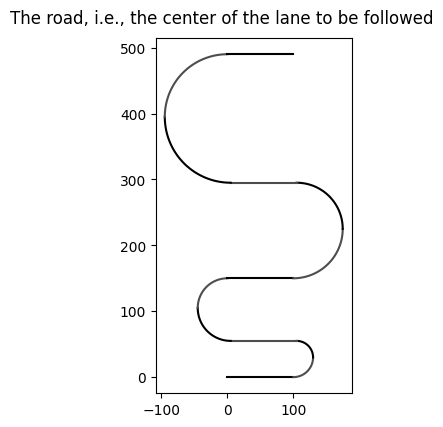

In [8]:
# Import the function that plots a road
from evaluation.evaluation_for_autonomous_driving import plot_road_from_list_of_road_elements

# Name of this road (which is used in the filename of the saved plot)
this_road_name = "01"

# Call the function that plots the road
plot_details_list = plot_road_from_list_of_road_elements(road_elements_list, path_for_saving_figures, this_road_name)


# Specify the Observation Parameters

**The minimum necessary observation**

Intuitively speaking:

* **For cruise control:** we need information about the speed of the car relative to the recommended speed.
* **For lane keeping:** we need information about how far the car is from the center of the lane (i.e., how far from the line-to-follow).

Specifically:

* **For cruise control:** we need the `vx_sensor` and `recommended_speed` observations to measure the speed of the car relative to the **current** recommended speed.
* **For lane keeping:** we need the `distance_to_closest_point` observation to measure how far the **current** position of the car is from the center of the lane, noting that this is a signed value so it contains the necessary information of which side of the lane center the car is on.

**Look-ahead information**

A limitation of the minimum observations above is that they only measure the **current** recommended speed and the **current** lane position. Hence, when there is a change in speed or curvature, the car can only react once it reaches that change.

By contrast, a human driving a car will (usually) adjust the car's speed in advance of reaching a speed change, and they will (usually) begin steering into a curve slightly before reaching the curve.

Hence, to add some **minimum** look ahead information, you can use:

* **For cruise control:** add the `next_recommended_speed` and `distance_to_next_recommended_speed` observations to allow the policy to "see" the speed change in advance of reaching it.
* **For lane keeping:** add the `look_ahead_line_coords_in_body_frame` or `look_ahead_road_curvatures` observation to allow the policy to "see" a curve in advance of reaching it.

\

**WHAT TO CHANGE:**

As described at the start of this notebook, you **SHOULD**:

* Select which of the possible observations are actually available to the policy (i.e., with the `obs` flag); and
* Ensure the rest of the possible observations are turned off (i.e., with the `info` flag)
* Start with the minimum observations first (see the notes directly above) and once you are finished evaluating that, then consider adding some look-ahead information.
* Take note of whether the observations that you selected have a `_stddev` parameter (i.e., the standard deviation of noise that is added to the observation).
* If there is a `_stddev` parameter, then you should consider this as a possible parameters to adjust in the "..." section where you perform an evaluation over uncertainties.

In [9]:
# SPECIFY THE OBSERVATION PARAMETERS
observation_parameters = {
    "should_include_ground_truth_px"                       :  "info",
    "should_include_ground_truth_py"                       :  "info",
    "should_include_ground_truth_theta"                    :  "info",
    "should_include_ground_truth_vx"                       :  "info",
    "should_include_ground_truth_vy"                       :  "info",
    "should_include_ground_truth_omega"                    :  "info",
    "should_include_ground_truth_delta"                    :  "info",
    "should_include_road_progress_at_closest_point"        :  "info",
    "should_include_vx_sensor"                             :  "obs",
    "should_include_distance_to_closest_point"             :  "obs",
    "should_include_heading_angle_relative_to_line"        :  "info",
    "should_include_heading_angular_rate_gyro"             :  "info",
    "should_include_closest_point_coords_in_body_frame"    :  "info",
    "should_include_look_ahead_line_coords_in_body_frame"  :  "info",
    "should_include_road_curvature_at_closest_point"       :  "info",
    "should_include_look_ahead_road_curvatures"            :  "info",
    "should_include_speed_limit"                           :  "info",
    "should_include_recommended_speed"                     :  "obs",
    "should_include_next_speed_limit"                      :  "info",
    "should_include_distance_to_next_speed_limit"          :  "info",
    "should_include_next_recommended_speed"                :  "info",
    "should_include_distance_to_next_recommended_speed"    :  "info",



    "scaling_for_ground_truth_px"                       :  1.0,
    "scaling_for_ground_truth_py"                       :  1.0,
    "scaling_for_ground_truth_theta"                    :  1.0,
    "scaling_for_ground_truth_vx"                       :  1.0,
    "scaling_for_ground_truth_vy"                       :  1.0,
    "scaling_for_ground_truth_omega"                    :  1.0,
    "scaling_for_ground_truth_delta"                    :  1.0,
    "scaling_for_road_progress_at_closest_point"        :  1.0,
    "scaling_for_vx_sensor"                             :  1.0,
    "scaling_for_distance_to_closest_point"             :  1.0,
    "scaling_for_heading_angle_relative_to_line"        :  1.0,
    "scaling_for_heading_angular_rate_gyro"             :  1.0,
    "scaling_for_closest_point_coords_in_body_frame"    :  1.0,
    "scaling_for_look_ahead_line_coords_in_body_frame"  :  1.0,
    "scaling_for_road_curvature_at_closest_point"       :  1.0,
    "scaling_for_look_ahead_road_curvatures"            :  1.0,
    "scaling_for_speed_limit"                           :  1.0,
    "scaling_for_recommended_speed"                     :  1.0,
    "scaling_for_next_speed_limit"                      :  1.0,
    "scaling_for_distance_to_next_speed_limit"          :  1.0,
    "scaling_for_next_recommended_speed"                :  1.0,
    "scaling_for_distance_to_next_recommended_speed"    :  1.0,

    "vx_sensor_bias"    : 0.0,
    "vx_sensor_stddev"  : 0.1,

    "distance_to_closest_point_bias"    :  0.0,
    "distance_to_closest_point_stddev"  :  0.01,

    "heading_angle_relative_to_line_bias"    :  0.0,
    "heading_angle_relative_to_line_stddev"  :  0.01,

    "heading_angular_rate_gyro_bias"    :  0.0,
    "heading_angular_rate_gyro_stddev"  :  0.01,

    "closest_point_coords_in_body_frame_bias"    :  0.0,
    "closest_point_coords_in_body_frame_stddev"  :  0.0,

    "look_ahead_line_coords_in_body_frame_bias"    :  0.0,
    "look_ahead_line_coords_in_body_frame_stddev"  :  0.0,

    "road_curvature_at_closest_point_bias"    :  0.0,
    "road_curvature_at_closest_point_stddev"  :  0.0,

    "look_ahead_road_curvatures_bias"    :  0.0,
    "look_ahead_road_curvatures_stddev"  :  0.0,

    "look_ahead_line_coords_in_body_frame_distance"    :  50.0,
    "look_ahead_line_coords_in_body_frame_num_points"  :  1,
}

# Additional environment settings



## Specify the Numerical Integration Details

Description of each details:

* `method`    The numerical
integration method, option available are:
`["euler", "huen", "midpoint", "rk4", "rk45"]`
* `Ts`    The time increment per simulation step (units: seconds)
* `num_steps_per_Ts`   The number of integration steps to split `Ts` into.

Generally, you do **NOT** need to change these details.


In [10]:
numerical_integration_parameters = {
    "method" : "rk4",
    "Ts" : 0.05,
    "num_steps_per_Ts" : 1,
}

##  Specify the Initial State Distribution

The initial state is sampled from a uniform
distribution between the minimum and maximum
(i.e., between lower and upper bounds)
> Note: a factor of (1/3.6) converts from units of [km/h] to [m/s]

In [11]:
# Initial speed: the lower and upper bounds of a uniform distribution
v_init_min_in_kmh = road_elements_list[0]["v_max_kph"] - 5.0
v_init_max_in_kmh = road_elements_list[0]["v_max_kph"] + 0.0

# Initial deviation from the line: the lower and upper bounds of a uniform distribution (units: meters)
py_init_min = -0.05
py_init_max =  0.05

# The full dictionary of all initial state distribution parameters:
initial_state_bounds = {
    "px_init_min" : 0.0,
    "px_init_max" : 0.0,
    "py_init_min" : py_init_min,
    "py_init_max" : py_init_max,
    "theta_init_min" : 0.0,
    "theta_init_max" : 0.0,
    "vx_init_min" : v_init_min_in_kmh * (1.0/3.6),
    "vx_init_max" : v_init_max_in_kmh * (1.0/3.6),
    "vy_init_min" : 0.0,
    "vy_init_max" : 0.0,
    "omega_init_min" : 0.0,
    "omega_init_max" : 0.0,
    "delta_init_min" : 0.0,
    "delta_init_max" : 0.0,
}

## Specify Termination Parameters

In [12]:
termination_parameters = {
    "speed_lower_bound"  :  0.0,
    "speed_upper_bound"  :  (200.0/3.6),
    "distance_to_closest_point_upper_bound"  :  20.0,
    "reward_speed_lower_bound"  :  0.0,
    "reward_speed_upper_bound"  :  0.0,
    "reward_distance_to_closest_point_upper_bound"  :  0.0,
}

# Environment Definition

## Initialise the Autonomous Driving Environment

Options available for the "render_mode" are:
`["matplotlib", None]`

In [13]:
env_base = gym.make(
    "ai4rgym/autonomous_driving_env",
    render_mode=None,
    bicycle_model_parameters=bicycle_model_parameters,
    road_elements_list=road_elements_list,
    numerical_integration_parameters=numerical_integration_parameters,
    termination_parameters=termination_parameters,
    initial_state_bounds=initial_state_bounds,
    observation_parameters=observation_parameters,
)

## Verify Environment

This section simply runs the `.reset()` and `.step()` functions of the Gymnasium and display the various objects that are produced. The most important things to check in this verification are:

* The `observation` dictionary only contains keys for the observation that you selected with `obs` above.
* The `info` dictionary contains keys for the observation that you deselected with `info` above.
* The `env.observation_space` and `env.action_space` have sensible lower and upper bounds for each over their entries.
* The `.step()` function returns:
  * A `reward` of 0.0 because we have not yet set any reward wrapper.
  * Numerical values of the `observation` and `info` that are reasonable.

In [14]:
# Reset the gymnasium
# > which also returns the first observation
observation, info_dict = env_base.reset()

In [15]:
observation

{'vx_sensor': array([22.016483], dtype=float32),
 'distance_to_closest_point': array([-0.01861818], dtype=float32),
 'recommended_speed': array([22.222223], dtype=float32)}

In [16]:
info_dict

{'ground_truth_px': array([0.], dtype=float32),
 'ground_truth_py': array([-0.03229218], dtype=float32),
 'ground_truth_theta': array([0.], dtype=float32),
 'ground_truth_vx': array([21.95668], dtype=float32),
 'ground_truth_vy': array([0.], dtype=float32),
 'ground_truth_omega': array([0.], dtype=float32),
 'ground_truth_delta': array([0.], dtype=float32),
 'road_progress_at_closest_point': array([0.], dtype=float32),
 'heading_angle_relative_to_line': array([0.01102862], dtype=float32),
 'heading_angular_rate_gyro': array([-0.0044879], dtype=float32),
 'closest_point_coords_in_body_frame': array([0.        , 0.03229218], dtype=float32),
 'look_ahead_line_coords_in_body_frame': array([[5.000000e+01],
        [3.229218e-02]], dtype=float32),
 'road_curvature_at_closest_point': array([0.], dtype=float32),
 'look_ahead_road_curvatures': array([0.], dtype=float32),
 'speed_limit': array([22.222223], dtype=float32),
 'next_speed_limit': array([22.222223], dtype=float32),
 'distance_to_next

In [17]:
env_base.observation_space

Dict('distance_to_closest_point': Box(-inf, inf, (1,), float32), 'recommended_speed': Box(-inf, inf, (1,), float32), 'vx_sensor': Box(-inf, inf, (1,), float32))

In [18]:
env_base.action_space

Box([-100.          -0.7853982], [100.          0.7853982], (2,), float32)

In [19]:
random_action = env_base.action_space.sample()

In [20]:
observation, reward, terminated, truncated, info = env_base.step(random_action)

In [21]:
observation

{'vx_sensor': array([21.855576], dtype=float32),
 'distance_to_closest_point': array([-0.02750536], dtype=float32),
 'recommended_speed': array([22.222223], dtype=float32)}

In [22]:
reward

0.0

In [23]:
info

{'ground_truth_px': array([1.0900561], dtype=float32),
 'ground_truth_py': array([-0.04459978], dtype=float32),
 'ground_truth_theta': array([-0.00742919], dtype=float32),
 'ground_truth_vx': array([21.647295], dtype=float32),
 'ground_truth_vy': array([-0.3827361], dtype=float32),
 'ground_truth_omega': array([-0.29583466], dtype=float32),
 'ground_truth_delta': array([-0.03926991], dtype=float32),
 'road_progress_at_closest_point': array([1.0900561], dtype=float32),
 'heading_angle_relative_to_line': array([0.03362033], dtype=float32),
 'heading_angular_rate_gyro': array([-0.30382258], dtype=float32),
 'closest_point_coords_in_body_frame': array([-0.00033134,  0.04459855], dtype=float32),
 'look_ahead_line_coords_in_body_frame': array([[49.998287  ],
        [ 0.41605446]], dtype=float32),
 'road_curvature_at_closest_point': array([0.], dtype=float32),
 'look_ahead_road_curvatures': array([0.], dtype=float32),
 'speed_limit': array([22.222223], dtype=float32),
 'next_speed_limit': ar

# PID Policy Class

## Define a PID Policy Class for cruise control and lane keeping combined

**NOTE:** The code for a "vanilla" PID policy is quite straight forward and there are many examples avialable on the internet. Hence, one can reasonably expect GenAI to produce code for a PID policy that is easy to read and verify.

The following `PIDPolicy` class was generated with the following "single-shot" prompt:

*PID policy class with kp_cc, ki_cc, kd_cc for cruise control and kp_lk, ki_lk, and kd_lk for lane keeping.*

* *Add an initialization function for setting the gains and a sampling time Ts.*
* *Add a reset functoin for reseting the integrators and previous errors.*
* *Add a compute_action function for executing the PID policy.*
* *The observations to compute_action is a dictionary with keys.*
* *The key "vx_sensor" is used for the cruise control PID.*
* *The key "distance_to_closest_point" is used for the lane keeping policy.*
* *Add a setpoint for the "desired_speed" and for the "desired_lane_position".*
* *These setpoints should have a function for changing their value.*
* *Also have the setpoints as optional arguments to the init function.*
* *The return from compute_action should be a numpy array with the cruise control action as the first element and the lane keeping action as the second element.*
* *For naming, call things "action" instead of "control".*
* *Add comments for every line of code.*

If you enter this prompt yourself to a GenAI tool, then you will also get the "typical" GenAI style explanation of the code. And you can ask further prompts to get explanations for parts of the code you may not understand.

\

**WHAT TO CHANGE:**

As described at the start of this notebook, you **SHOULD**:

* Read this whole `PIDPolicy` class to understand its structure and parameters.
* If you choose to change the observations (see above), then you need to also change the `compute_action()` function of the `PIDPolicy` class to use the available observations.
  * For example, if you add a `look_ahead_recommended_speed` observation, then you need to adjust the `compute_action()` so that the policy reduces the car's speed before it reaches an upcoming road element with a reduce recommeded speed.

In [24]:
class PIDPolicy:

    def __init__(self, kp_cc, ki_cc, kd_cc, kp_lk, ki_lk, kd_lk, Ts, desired_speed=0.0, desired_lane_position=0.0):
        """
        Initialize the PID policy with given gains for both cruise control and lane keeping.

        Parameters:
            kp_cc, ki_cc, kd_cc  :  PID gains for cruise control.
            kp_lk, ki_lk, kd_lk  :  PID gains for lane keeping.
            Ts  :  Sampling time for the policy (i.e., the discrete-time step). (Units: seconds)
            desired_speed  :  the operators setpoint for the reference speed of cruise control. (Units: m/s)
            desired_lane_position  :  the operators setpoint for the reference distance of the car to the lane center. (Units: m)
        """
        # PID gains for cruise control
        self.kp_cc = kp_cc
        self.ki_cc = ki_cc
        self.kd_cc = kd_cc

        # PID gains for lane keeping
        self.kp_lk = kp_lk
        self.ki_lk = ki_lk
        self.kd_lk = kd_lk

        # Sampling time (time step)
        self.Ts = Ts

        # Initialize setpoints
        self.desired_speed = desired_speed
        self.desired_lane_position = desired_lane_position

        # Call the reset function to initialize the integrator states and the
        # previous error for each PID
        self.reset()

    def reset(self):
        """
        Reset the integrators and previous errors for both cruise control and lane keeping.
        """
        # Reset the cruise control state
        self.integral_cc = 0.0
        self.prev_error_cc = 0.0
        # Reset the lane keeping state
        self.integral_lk = 0.0
        self.prev_error_lk = 0.0

    def set_desired_speed(self, desired_speed):
        """
        Update the setpoint for the cruise control speed.
        """
        # Could enforce limits on the allowed setpoints
        self.desired_speed = desired_speed

    def set_desired_lane_position(self, desired_lane_position):
        """
        Update the setpoint for the lane keeping position.
        """
        # Could enforce limits on the allowed setpoints
        self.desired_lane_position = desired_lane_position

    def compute_action(self, observation, info_dict, terminated, truncated):
        """
        Execute the PID policy using the given observation.

        Parameters:
            observation: A dictionary with sensor readings:
                - 'vx_sensor': The current speed from the vehicle's speed sensor.
                - 'distance_to_closest_point': The current distance to the lane center.
                - 'recommended_speed': The recommeded speed of the closest road segment

        Returns:
            A numpy array [cc_action, lk_action] with the actions for
            cruise control and lane keeping respectively.
        """
        # ---------------------
        # CRUISE CONTROL POLICY
        # > Get the relevant observation
        vx_sensor = observation["vx_sensor"][0]
        recommended_speed = observation["recommended_speed"][0]
        #next_recommended_speed = observation["next_recommended_speed"][0]
        #distance_to_next_recommended_speed = observation["distance_to_next_recommended_speed"][0]

        # > Compute the error (as "desired minus observation")
        error_cc = recommended_speed - vx_sensor

        # > Add this error to the integral (multipled by the sampling time)
        self.integral_cc += error_cc * self.Ts
        # > Compute the discrete-time derivative to the previous error
        derivative_cc = (error_cc - self.prev_error_cc) / self.Ts

        # > Compute the action
        cc_action = (self.kp_cc * error_cc +
                      self.ki_cc * self.integral_cc +
                      self.kd_cc * derivative_cc)
        # > Update the previous error variable
        self.prev_error_cc = error_cc

        # -------------------
        # LANE KEEPING POLICY
        # > Get the relevant observation
        distance_to_closest_point = observation["distance_to_closest_point"][0]

        # > Compute the error (as "setpoint minus observation")
        error_lk = self.desired_lane_position - distance_to_closest_point

        # > Add this error to the integral (multipled by the sampling time)
        self.integral_lk += error_lk * self.Ts
        # > Compute the discrete-time derivative to the previous error
        derivative_lk = (error_lk - self.prev_error_lk) / self.Ts

        # > Compute the action
        lk_action = (self.kp_lk * error_lk +
                      self.ki_lk * self.integral_lk +
                      self.kd_lk * derivative_lk)
        # > Update the previous error variable
        self.prev_error_lk = error_lk

        # -----------------------------------
        # Return the actions as a numpy array
        return np.array([cc_action, lk_action], dtype=np.float32)


## Test the the PID Policy Class above functions as expected

This is intended as a quick sanity check.

In [25]:
# Initialize the PIDPolicy class
temp_pid = PIDPolicy(kp_cc=1.0, ki_cc=0.1, kd_cc=0.01, kp_lk=1.2, ki_lk=0.05, kd_lk=0.02, Ts=0.1)

# Set desired setpoints
temp_pid.set_desired_speed(60.0/3.6)
temp_pid.set_desired_lane_position(0.0)

# Create an example observation from the environment
observation, info_dict = env_base.reset()

# Compute the actions for cruise control and lane keeping
action = temp_pid.compute_action(observation, info_dict=None, terminated=False, truncated=False)

print("action[0] = \"drive command\"  = " + str(action[0]) )
print("action[1] = \"steering angle\" = " + str(action[1]) )

action[0] = "drive command"  = 1.1283896
action[1] = "steering angle" = 0.022243945


# One-time evaluation the PID Policy to test the workflow

## Create a folder for saving evaluation figures

**Note:** if running this notebook locally on your computer (i.e., not on Google Colab), then you need to adjust the path accordingly.

In [26]:
# Specify the policy name as a string
# > This is only used for naming the folder where results are saved
policy_name = "PID"

# Create the directories where the figures are saved
path_for_saving_figures = f"/content/{policy_name}/eval"
ensure_dir(path_for_saving_figures)

## Perform one simulation of the PID policy, and plot the time series results

The `simulate_policy(...)` function returns the time series simulation results as a dictionary. The following keys in the dictionary are all `numpy` arrays with length equal to the "number of simulation time steps plus 1".

**IMPORTANT:** all the data returned by this function is "ground truth" data, i.e., it does not included any noise that may be added to the observation of the respective quantity.

* `time_in_seconds`  :  simulation "wall-clock" time
* `time_index`  :  simulation time index
* `reward`  :  reward value
* `px`  :  world-frame x-axis position
* `py`  :  world-frame y-axis position
* `theta`  :  heaing angle
* `vx`  :  body-frame x-axis velocity
* `vy`  :  body-frame y-axis velocity
* `omega`  :  angular velocity
* `delta`  :  steering angle
* `road_progress_at_closest_point`  :  road progress
* `distance_to_closest_point`  :  signed distance to line
* `heading_angle_relative_to_line`  :  relative heading angle per
* `road_curvature_at_closest_point`  :  road curvature of cloest point on the line
* `px_closest`  :  world-frame x-axis coordinate of cloest point on the line
* `py_closest`  :  world-frame y-axis coordinate of cloest point on the line
* `px_closest_in_body_frame`  :  body-frame x-axis coordinate of cloest point on the line
* `py_closest_in_body_frame`  :  body-frame y-axis coordinate of cloest point on the line
* `look_ahead_x_coords_in_body_frame`  :  body frame x-axis coordinates of the look ahead points (numpy array of size "num look ahead points" -by- "sim length"
* `look_ahead_y_coords_in_body_frame`  :  body frame y-axis coordinates of the look ahead points (numpy array of size "num look ahead points" -by- "sim length"
* `look_ahead_road_curvatures`  :  curvature of the road at the look ahead points (numpy array of size "num look ahead points" -by- "sim length"
* `drive_command`  :  the drive percentage command
* `delta_request`  :  the steering request command

Additionally, the time series dictoinary has the following two flags:
* `terminated`  :  Boolean flag for whether termination occurred during the simulation.
* `truncated`  :  Boolean flag for whether truncation occurred during the simulation.

**NOTE:** If trunction or termination occurs, then the results still have length equal to the "number of simulation time step plus 1", and all entries after truncation / termination are filled in with `numpy.nan`.

\

**WHAT TO CHANGE:**

As described at the start of this notebook, you **SHOULD**:

* Edit the `kp_cc` and `kp_lk` parameters (i.e., the proportional gains for the cruise control and lane keeping respectively) in the following line of code:
``` Python
pid_policy = PIDPolicy(kp_cc=5.0, ki_cc=0.0, kd_cc=0.00, kp_lk=0.1, ki_lk=0.0, kd_lk=0.00, Ts=numerical_integration_parameters["Ts"])
```
* The goal is to find a proportional gains that are a good starting point for the hand-tuning process of the subsequent section.




Now starting simulation.
Simulation finished


Saved figure: /content/PID/eval/ad_cartesian_coords_example.pdf
Saved figure: /content/PID/eval/ad_time_series_example.pdf


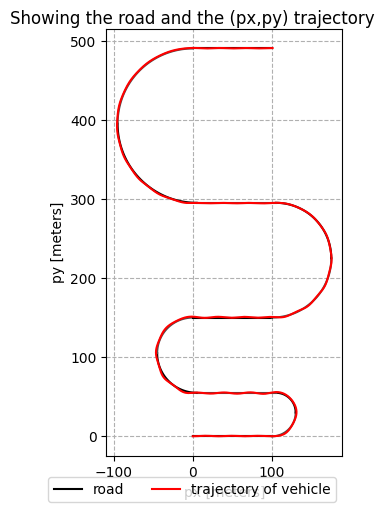

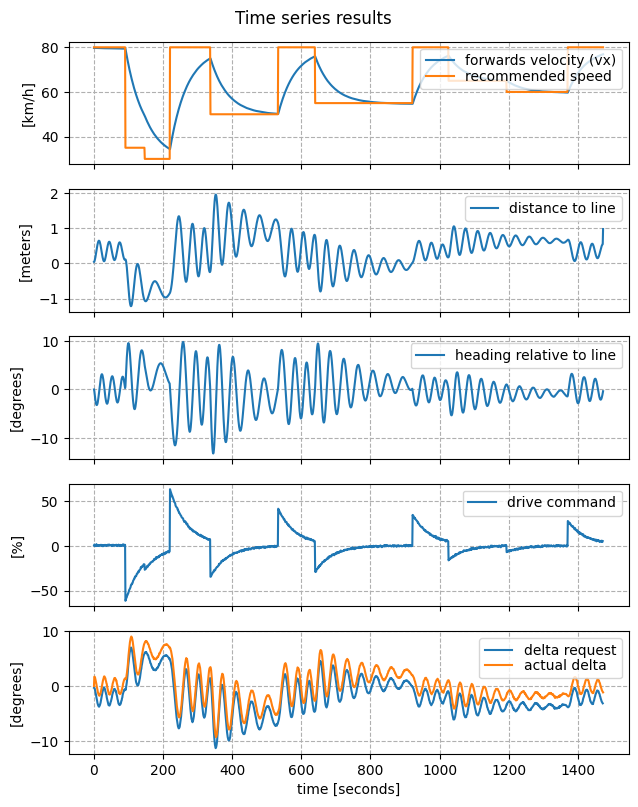

In [27]:
# Import the function for simulating the autonomous driving environment
from evaluation.evaluation_for_autonomous_driving import simulate_policy
from evaluation.evaluation_for_autonomous_driving import plot_results_from_time_series_dict

# Specify the length of the simulation in time steps
# > If termination or truncation is flagged by the "step" function,
#   Then, the simulation ends.
N_sim = 5000

# Specify the seed for when the simulate function resets the random number generator
sim_seed = 1;

# Initialize the PIDPolicy class
pid_policy = PIDPolicy(kp_cc=5.0, ki_cc=0.0, kd_cc=0.00, kp_lk=0.1, ki_lk=0.0, kd_lk=0.00, Ts=numerical_integration_parameters["Ts"])

# Set desired setpoints
pid_policy.set_desired_lane_position(0.0)

# Call the function for simulating a given PID policy
pid_policy.reset()
sim_time_series_dict = simulate_policy(env_base, N_sim, pid_policy, seed=sim_seed, verbose=1)

# Call the plotting function
file_name_suffix = "example"
plot_details_list = plot_results_from_time_series_dict(env_base, sim_time_series_dict, path_for_saving_figures, file_name_suffix, should_plot_reward=False)

# Animate the time series results

We first define a function to make it easier to create animations. Then call the function for the simulation results produced in the previous cell.

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Uncomment the displaying of the animation, which is this line of code:
``` Python
HTML(ani.to_jshtml())
```
* Watch the animation once to see what additional perspective it gives to you compared to a plot of the time-series data.
* Consider again commenting out the animation display because it can take a while to run.
* It you wish to save a copy of the animation, uncomment the save commands for the format you want (gif, mp4, or webm).

In [28]:
def animate_from_sim_time_series_dict(sim_time_series_dict, Ts):
    # Extract the necessary trajectory information from the "sim_time_series_dict"
    px_traj    = sim_time_series_dict["px"]
    py_traj    = sim_time_series_dict["py"]
    theta_traj = sim_time_series_dict["theta"]
    delta_traj = sim_time_series_dict["delta"]
    # Call the environments function to create the simulation
    ani = env_base.unwrapped.render_matplotlib_animation_of_trajectory(px_traj, py_traj, theta_traj, delta_traj, Ts, traj_increment=3)
    # Return the animation object
    return ani

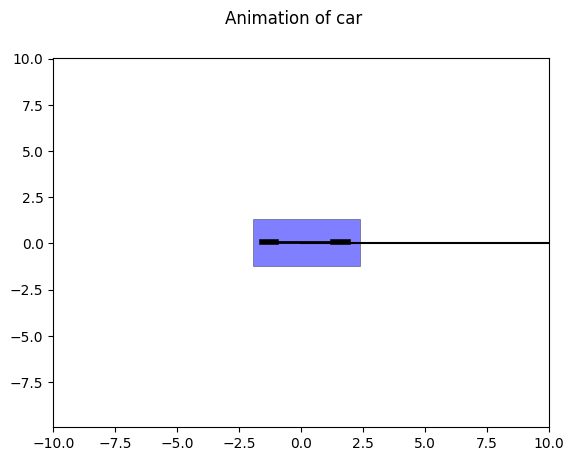

In [29]:
# Call the animation function, which return an animation object
ani = animate_from_sim_time_series_dict(sim_time_series_dict, numerical_integration_parameters["Ts"])

# Import the tool for displaying the animation
from IPython.display import HTML

# Display that the following commands can take a while to complete
#print("Now creating the animation, this may take some time.")

# Display the animation using JSHTML
# HTML(ani.to_jshtml())

# Display the animation using HTML5 video
# > This should be smaller than GIF.
# > This needs ffmpeg, which should be available in Colab.
#HTML(ani.to_html5_video())

In [30]:
# Display that the following commands can take a while to complete
#print("Now saving the animation, this may take some time.")

# Save the animation as GIF
#path_and_filename_for_gif = f"{path_for_saving_figures}/trajectory_animation.gif"
#ani.save(path_and_filename_for_gif)
#print(f"Saved animation at {path_and_filename_for_gif}")

# Save the animation as MP4
# > This sholud be a smaller filesize than GIF
# > This needs ffmpeg, which should be available in Colab.
#path_and_filename_for_mp4 = f"{path_for_saving_figures}/trajectory_animation.mp4"
#ani.save(path_and_filename_for_mp4, writer="ffmpeg", dpi=120)
#print(f"Saved animation at {path_and_filename_for_mp4}")

# Save the animation as WEBM
# > This sholud be a smaller filesize than MP4
# > This needs ffmpeg, which should be available in Colab.
#path_and_filename_for_webm = f"{path_for_saving_figures}/trajectory_animation.webm"
#from matplotlib import animation
#writer_vp9 = animation.FFMpegWriter(fps=30, codec='libvpx-vp9', bitrate=1800)
#ani.save(path_and_filename_for_webm, writer=writer_vp9, dpi=120)
#print(f"Saved animation at {path_and_filename_for_webm}")


# Tune the Lane Keeping PID Policy

For this notebook, we only tune the lane-keeping PID policy. We use a rule-of-thumb manual tuning procedure because this avoids assuming pre-requisite knowledge required for model-based analytical PID design methods.

**IMPORTANT NOTE:** In the "Environment Settings" above, the steering offset parameter in the bicycle model is set to 2 degrees, i.e., `"delta_offset" : 2.0 * np.pi/180,`. This steering offset is added so that the performance of lane keeping with a proportional policy (i.e., P-only) has a steady-state offset that needs to be corrected by including an integral component in the policy.

**The manual tuning procedure that we follow is:**

* **(Step 1)** Sweep over a range of proportional gains (with zero derivative and integral gain). Choose a proportional gain that gives:
  * Fast response.
  * Most likely has oscillations, and those osciallation should descrease in amplitude over time.
  * Tracks the reference, albeit with a steady-state offset.
* **(Step 2)** Add a small derivative gain to dampen the oscillation.
  * It may not be possible to remove all osciallation.
  * If there are a few options with "similarly good" performance, then, from those options choose the smaller derivative gain because the derivative term is suspectible to noise on the observation.
* **(Step 3)** Add a small integral gain to remove steady-state error.
  * If there are a few options with "similarly good" performance, then, from those options choose the smaller integral gain because the integral term can introduce oscillation.

### IMPORTANT Notes before we start tuning

At the end of the tuning process for the settings of this notebook, the lane-keeping behaviour is quite good. It is **important** to remember that you, **as the designer**, are in charge of:

* Testing the PID policy in different situations to find its limits, for example:
  * Roads with higher curvature.
  * A range of recommended speeds.
* Tuning and adapting the PID policy to work across multiple different situations.
  * This often leads to the topic of so-called "gain scheduling" where the PID parameters are changes as a function of the conditions, for example:
    * Based on the speed setpoint, the P, I, and D gain parameters of the lane keeping policy are changed to different values.
    * Based on an observation of the road's curvature, the P, I, and D gain parameters of the lane keeping policy are changed to different values.
  * Gain scheduling comes with its own set of complications to design because the switching between different sets of gain can cause sudden changes in behaviour.

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Work through the steps to tune the lane-keeping policy for the road that you have defined.
* Repeat this hand-tuning process for the cruise-control policy (by copying the code and adjusting it to be for the speed of the car).

## (Step 1) Sweep over proportional gain

It can take some testing across different range of proportional gain values to find a range of values to compare in more detail.

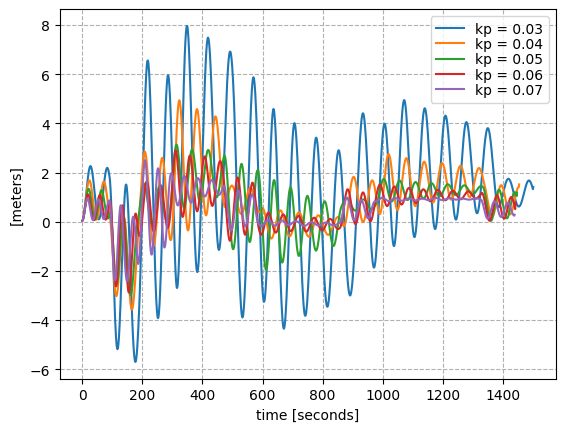

In [31]:
# Import the function for simulating the autonomous driving environment
from evaluation.evaluation_for_autonomous_driving import simulate_policy
from evaluation.evaluation_for_autonomous_driving import plot_results_from_time_series_dict

# Specify the length of the simulation in time steps
# > If termination or truncation is flagged by the "step" function,
#   Then, the simulation ends.
N_sim = 5000

# Specify the seed for when the simulate function resets the random number generator
sim_seed = 1;

# Specify the list of proportional gains to sweep over
kp_lk_list = [0.03, 0.04, 0.05, 0.06, 0.07]

# Specifiy the desired speed and lane position
desired_speed = 60.0/3.6
desired_lane_position = 0.0

# Initialize a list for the results per gain
list_of_times = []
list_of_dist_to_line_traj = []

# Iterate over the gains
for kp_lk in kp_lk_list:
    # Initialize the PIDPolicy class
    pid_policy = PIDPolicy(kp_cc=1.0, ki_cc=0.0, kd_cc=0.00, kp_lk=kp_lk, ki_lk=0.0, kd_lk=0.00, Ts=numerical_integration_parameters["Ts"])
    # Set desired setpoints
    pid_policy.set_desired_speed(desired_speed)
    pid_policy.set_desired_lane_position(desired_lane_position)
    # Call the function for simulating a given policy
    pid_policy.reset()
    sim_time_series_dict = simulate_policy(env_base, N_sim, pid_policy, seed=sim_seed, verbose=0)
    # Save only the results of interest
    list_of_times.append(sim_time_series_dict["time_in_seconds"])
    list_of_dist_to_line_traj.append(sim_time_series_dict["distance_to_closest_point"])

# Plot the results
fig, axs = plt.subplots(1,1)

# Initialise list for legend handles
legend_lines = []

# Iterate over the gains and plot the results for each
for i_kp in range(len(kp_lk_list)):
    # Plot the trajectory
    line_handle, = axs.plot(list_of_times[i_kp], list_of_dist_to_line_traj[i_kp])
    # Set the legend string
    line_handle.set_label("kp = " + str(kp_lk_list[i_kp]))
    # Add the legend handle
    legend_lines.append(line_handle)

# Set the labels:
axs.set_xlabel('time [seconds]', fontsize=10)
axs.set_ylabel('[meters]', fontsize=10)
# Add grid lines
axs.grid(visible=True, which="both", axis="both", linestyle='--')
# Show a legend
axs.legend(handles=legend_lines, loc="upper right", ncol=1, labelspacing=0.1)



## (Step 2) Add some derivative gain

Based on the above, we fix a proportional gain of `kp_lk = 0.06` because this time series trajectory has clearly reducing amplitude of oscillations and moves in the direction of the setpoint (which is a setpoint of 0.0 in this case).

Now we simulate with a sweep over a range of options for the derivative gain.

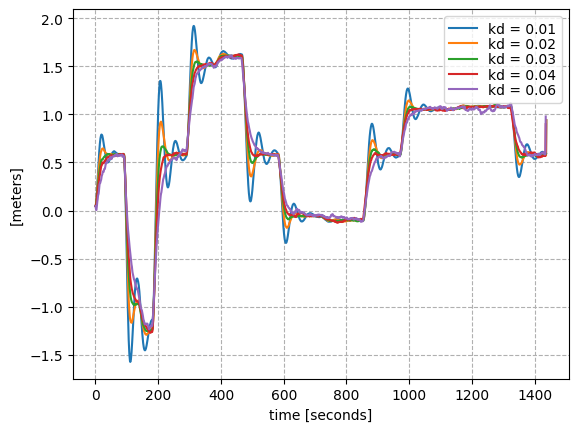

In [32]:
# Import the function for simulating the autonomous driving environment
from evaluation.evaluation_for_autonomous_driving import simulate_policy
from evaluation.evaluation_for_autonomous_driving import plot_results_from_time_series_dict

# Specify the length of the simulation in time steps
# > If termination or truncation is flagged by the "step" function,
#   Then, the simulation ends.
N_sim = 5000

# Specify the seed for when the simulate function resets the random number generator
sim_seed = 1;

# Speficy the proportional gain
kp_lk = 0.06

# Specify the list of derivative gains to sweep over
kd_lk_list = [0.01, 0.02, 0.03, 0.04, 0.06]

# Specifiy the desired speed and lane position
desired_speed = 60.0/3.6
desired_lane_position = 0.0

# Initialize a list for the results per gain
list_of_times = []
list_of_dist_to_line_traj = []

# Iterate over the gains
for kd_lk in kd_lk_list:
    # Initialize the PIDPolicy class
    pid_policy = PIDPolicy(kp_cc=1.0, ki_cc=0.0, kd_cc=0.00, kp_lk=kp_lk, ki_lk=0.0, kd_lk=kd_lk, Ts=numerical_integration_parameters["Ts"])
    # Set desired setpoints
    pid_policy.set_desired_speed(desired_speed)
    pid_policy.set_desired_lane_position(desired_lane_position)
    # Call the function for simulating a given policy
    pid_policy.reset()
    sim_time_series_dict = simulate_policy(env_base, N_sim, pid_policy, seed=sim_seed, verbose=0)
    # Save only the results of interest
    list_of_times.append(sim_time_series_dict["time_in_seconds"])
    list_of_dist_to_line_traj.append(sim_time_series_dict["distance_to_closest_point"])

# Plot the results
fig, axs = plt.subplots(1,1)

# Initialise list for legend handles
legend_lines = []

# Iterate over the gains and plot the results for each
for i_kd in range(len(kd_lk_list)):
    # Plot the trajectory
    line_handle, = axs.plot(list_of_times[i_kd], list_of_dist_to_line_traj[i_kd])
    # Set the legend string
    line_handle.set_label("kd = " + str(kd_lk_list[i_kd]))
    # Add the legend handle
    legend_lines.append(line_handle)

# Set the labels:
axs.set_xlabel('time [seconds]', fontsize=10)
axs.set_ylabel('[meters]', fontsize=10)
# Add grid lines
axs.grid(visible=True, which="both", axis="both", linestyle='--')
# Show a legend
axs.legend(handles=legend_lines, loc="upper right", ncol=1, labelspacing=0.1)

## (Step 3) Add some integral gain

Based on the above, the time series trajectory for gains of 0.03 and 0.04 have similar performance in terms of significantly dampening the oscillation (compared to the gains of 0.01 and 0.03). Hence, we fix a derivative gain of `kp_lk = 0.03` because this is the lower of those two gains.

Now we simulate with a sweep over a range of options for the integral gain.

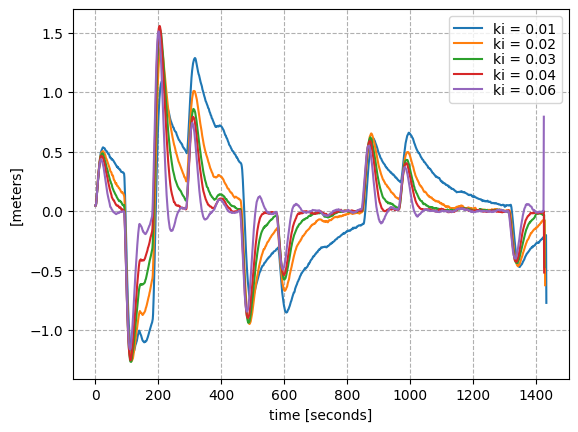

In [33]:
# Import the function for simulating the autonomous driving environment
from evaluation.evaluation_for_autonomous_driving import simulate_policy
from evaluation.evaluation_for_autonomous_driving import plot_results_from_time_series_dict

# Specify the length of the simulation in time steps
# > If termination or truncation is flagged by the "step" function,
#   Then, the simulation ends.
N_sim = 5000

# Specify the seed for when the simulate function resets the random number generator
sim_seed = 1;

# Speficy the proportional gain
kp_lk = 0.06

# Speficy the derivative gain
kd_lk = 0.03

# Specify the list of integral gains to sweep over
ki_lk_list = [0.01, 0.02, 0.03, 0.04, 0.06]

# Specifiy the desired speed and lane position
desired_speed = 60.0/3.6
desired_lane_position = 0.0

# Initialize a list for the results per gain
list_of_times = []
list_of_dist_to_line_traj = []

# Iterate over the gains
for ki_lk in ki_lk_list:
    # Initialize the PIDPolicy class
    pid_policy = PIDPolicy(kp_cc=1.0, ki_cc=0.0, kd_cc=0.00, kp_lk=kp_lk, ki_lk=ki_lk, kd_lk=kd_lk, Ts=numerical_integration_parameters["Ts"])
    # Set desired setpoints
    pid_policy.set_desired_speed(desired_speed)
    pid_policy.set_desired_lane_position(desired_lane_position)
    # Call the function for simulating a given policy
    pid_policy.reset()
    sim_time_series_dict = simulate_policy(env_base, N_sim, pid_policy, seed=sim_seed, verbose=0)
    # Save only the results of interest
    list_of_times.append(sim_time_series_dict["time_in_seconds"])
    list_of_dist_to_line_traj.append(sim_time_series_dict["distance_to_closest_point"])

# Plot the results
fig, axs = plt.subplots(1,1)

# Initialise list for legend handles
legend_lines = []

# Iterate over the gains and plot the results for each
for i_ki in range(len(ki_lk_list)):
    # Plot the trajectory
    line_handle, = axs.plot(list_of_times[i_ki], list_of_dist_to_line_traj[i_ki])
    # Set the legend string
    line_handle.set_label("ki = " + str(ki_lk_list[i_ki]))
    # Add the legend handle
    legend_lines.append(line_handle)

# Set the labels:
axs.set_xlabel('time [seconds]', fontsize=10)
axs.set_ylabel('[meters]', fontsize=10)
# Add grid lines
axs.grid(visible=True, which="both", axis="both", linestyle='--')
# Show a legend
axs.legend(handles=legend_lines, loc="upper right", ncol=1, labelspacing=0.1)

## Evaluate the final set of PID parameters

Based on the above, we fix a integral gain of `ki_lk = 0.04` because this has quick convergence to a neighbourhood of the setpoint (which is a setpoint of 0 in this case) and does not introduce overshoot (observe that the gain of 0.06 overshoots past zero on the initial part of the time series trajectory).

Hence, the final PID gain parameters that we have determined are:

* `kp_lk = 0.06`
* `ki_lk = 0.04`
* `kd_lk = 0.03`

**IMPORTANT**

* This tuning process is **NOT** claiming to produce the "best" possible set of PID gain parameters, we need to do a performance metric evaulation to check that.
* This tuning process above is intended to give you a flavour for what a structured manual tuning process can look like.



Now starting simulation.
Simulation finished


Saved figure: /content/PID/eval/ad_cartesian_coords_example.pdf
Saved figure: /content/PID/eval/ad_time_series_example.pdf


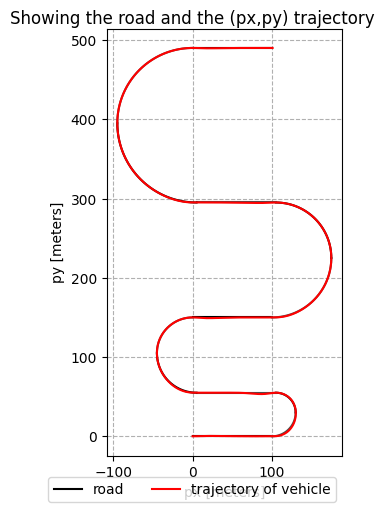

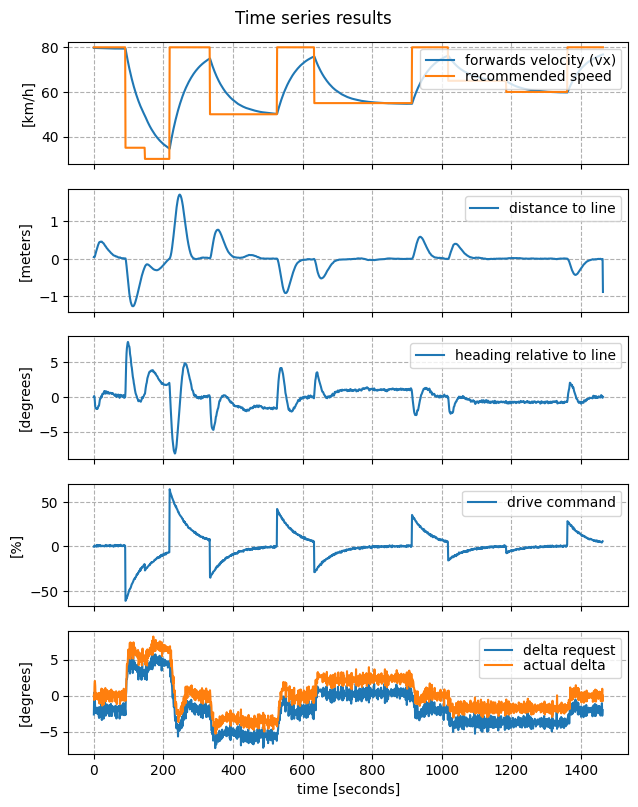

In [34]:
# Import the function for simulating the autonomous driving environment
from evaluation.evaluation_for_autonomous_driving import simulate_policy
from evaluation.evaluation_for_autonomous_driving import plot_results_from_time_series_dict

# Specify the length of the simulation in time steps
# > If termination or truncation is flagged by the "step" function,
#   Then, the simulation ends.
N_sim = 5000

# Specify the seed for when the simulate function resets the random number generator
sim_seed = 1;

# Speficy the PID gains
kp_lk = 0.06
ki_lk = 0.04
kd_lk = 0.03

# Initialize the PIDPolicy class
pid_policy = PIDPolicy(kp_cc=5.0, ki_cc=0.0, kd_cc=0.00, kp_lk=kp_lk, ki_lk=ki_lk, kd_lk=kd_lk, Ts=numerical_integration_parameters["Ts"])

# Set desired setpoints
#pid_policy.set_desired_speed(60.0/3.6)
pid_policy.set_desired_lane_position(0.0)

# Call the function for simulating a given PID policy
pid_policy.reset()
sim_time_series_dict = simulate_policy(env_base, N_sim, pid_policy, seed=sim_seed, verbose=1)

# Call the plotting function
file_name_suffix = "example"
plot_details_list = plot_results_from_time_series_dict(env_base, sim_time_series_dict, path_for_saving_figures, file_name_suffix, should_plot_reward=False)

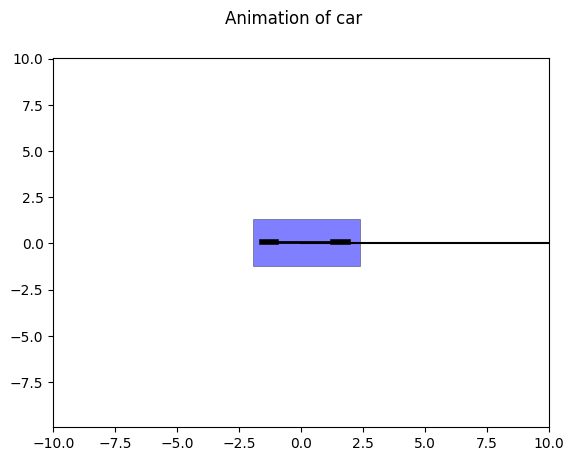

In [35]:
# Call the animation functoin
ani = animate_from_sim_time_series_dict(sim_time_series_dict, numerical_integration_parameters["Ts"])

# Display the animation
#from IPython.display import HTML
#HTML(ani.to_jshtml())

# Tune the Cruise Control PID Policy

This notebook does not included tuning for the Cruise Control PID policy.

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Use the "Tune the Lane Keeping PID Policy" section above as a template for tuning a cruise control PID policy.

# Performance Metrics

## Define a Performance Metrics Function per simulation time series

**You should change the details of this function to compute your performance metrics!**

This function is tailored to the dictionary structure of the simulation time series described for the previous section.

**NOTE:** If trunction or termination occurs, then the results still have length equal to the "number of simulation time step plus 1", and all entries after truncation / termination are filled in with `numpy.nan`. Hence, you need to be careful that `numpy.nan` is handled correctly by your performance metric code.

**NOTE:** You should change the return type as necessary, for example, a dictionary might be tedious to process for the next step of putting this function inside a longer evaluation loop over noise and other uncertainties.

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Edit the `compute_performance_metrics_from_time_series()` to:
  * Remove the performance metric equations that are implemented there.
  * Implement the equations that you have defined as your performance metrics.

In [36]:
def compute_performance_metrics_from_time_series(sim_time_series_dict):
    # Compute the performance metrics for lane-keeping
    # > To be implement by you

    # Compute the performance metrics for cruise control
    # > Extract the relevant data from the time series dictionary
    speed_time_series = sim_time_series_dict["vx"]
    recommended_speed_time_series = sim_time_series_dict["recommended_speed_at_closest_point"]
    # > Compute the mean relative speed metric
    avg_speed_relative_to_recommended_speed = np.nanmean(speed_time_series-recommended_speed_time_series)
    # > Compute the max exceedence metric
    max_speed_above_recommended_speed = np.nanmax(speed_time_series-recommended_speed_time_series)

    # Return the results
    return {
        "avg_speed_relative_to_recommended_speed_in_kph"  :  avg_speed_relative_to_recommended_speed * 3.6,
        "max_speed_above_recommended_speed_in_kph"  :  max_speed_above_recommended_speed * 3.6,
    }


## Run the Performance Metric function for one simulation

This is a check that the performance metric function is running without errors and is computing sensible value.

In [37]:
# Simulate with the same seed as above to check that it gets the results consistent
sim_seed = 1;
sim_time_series_dict = simulate_policy(env_base, N_sim, pid_policy, seed=sim_seed, verbose=1)

# Call the function for computing the performance metrics
pm_dict = compute_performance_metrics_from_time_series(sim_time_series_dict)

# Display the performance metric values
print("Performance Metric dictionary:")
print(pm_dict)



Now starting simulation.
Simulation finished


Performance Metric dictionary:
{'avg_speed_relative_to_recommended_speed_in_kph': np.float32(-0.36184263), 'max_speed_above_recommended_speed_in_kph': np.float32(44.335102)}


## Define function to compute the Performace Metrics over uncertainties

**NOTE:** You need to write your own version of this function to iterate over the model parameters and other uncertainties in the fashion that you deem to be appropriate for the environment and the analysis you want to perform!

**NOTE:** this can become quite a long function because it is more reliable to re-create the environment with every change to the model parameters (e.g., parameters of the car and/or the shape of the road), hence the function takes in all the "baseline" parameters as input arguments. If different policies need different wrapper (e.g., recale action wrapper), this adds an extra layed to complexity to the function.

Conceptually, the **psuedo code** that this particular example implements is:

```
(1)   pm_per_sim = []
(2)   for mass_multiplier in {0.90,0.91,…,1.09,1.10}
(3)       env.set_mass(baseline_mass * mass_multiplier)
(4)       for noise_and_init_condition = 1:100
(5)           time_series = simulate(env, policy, sim_length)
(6)           pm_per_sim.append( eval_pm(sim_time_series) )
(7)       end for
(8)   end for
(9)   pm_overall_mean = mean(pm_per_sim)
(10)  pm_overall_stddev = stddev(pm_per_sim)
```

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Edit the `performance_metrics_over_uncertainties()` function to:
  * Adjust the range and quantity of uncertainties that you choose to consider.
  * Remember to write down a justification for the source of uncertainty that you choose to consider, and for the range of values you use for each uncertainty.
  * As thse computation of `performance_metrics_over_uncertainties()` can take a long time, it is reasonable to:
    * **During policy synthesis** use fewer values for each uncertainty, which speeds up computations..
    * **During "final evaluation** use more values for each uncertainty, which gives a more thorough (and ethically appropriate) evaluation when comparing the performance of multiple policies.

In [38]:
def performance_metrics_over_uncertainties(
    N_sim,
    policy,
    should_use_rescale_action_wrapper,
    bicycle_model_parameters,
    road_elements_list,
    numerical_integration_parameters,
    termination_parameters,
    initial_state_bounds,
    observation_parameters,
):
    # Initialise a list for all the performance metrics
    pm_per_sim_list = []

    # Specify the range of uncertanties
    mass_multipliers = np.arange(start=0.95, stop=1.051, step=0.05)
    sim_range = range (0,50)

    # Compute the number of simulation that will be performed
    num_sims_total = len(mass_multipliers) * len(sim_range)

    # Display a progress bar
    print("Now starting " + str(num_sims_total) + " simulations, this may take a while.")
    print("Progress indicator:")
    print("0%        50%       100%")
    print("|----|----|----|----|")
    print("|",end="")

    # Some variables for keeping track of the progress
    progress_inc = 0.05
    next_progress_print = progress_inc
    i_prog = 0

    # Iterate over the perturbations of model parameters
    for mass_multiplier in mass_multipliers:
        # Create an environment with the adjusted mass parameter
        # > Take a copy of the existing model parameters
        bicycle_model_parameters_adjusted = bicycle_model_parameters.copy()
        # > Adjust the mass parameter
        bicycle_model_parameters_adjusted["m"] = mass_multiplier * bicycle_model_parameters["m"]
        # > Make the environment
        env_adjusted = gym.make(
            "ai4rgym/autonomous_driving_env",
            render_mode=None,
            bicycle_model_parameters=bicycle_model_parameters_adjusted,
            road_elements_list=road_elements_list,
            numerical_integration_parameters=numerical_integration_parameters,
            termination_parameters=termination_parameters,
            initial_state_bounds=initial_state_bounds,
            observation_parameters=observation_parameters,
        )
        # > Add the rescale action wrapper (if requested)
        if (should_use_rescale_action_wrapper):
            env_adjusted = gym.wrappers.RescaleAction(env_adjusted, min_action=-1, max_action=1)

        # Initialise a seed for the random number generators
        sim_seed = 0

        # Iterate over 100 simulation
        for i_sim in sim_range:
            # Reset the policy (if it has a reset function)
            if hasattr(policy, 'reset'):
                policy.reset()
            # Increment the seed
            sim_seed += 1
            # Call the simulation function
            sim_time_series_dict = simulate_policy(env_adjusted, N_sim, policy, seed=sim_seed)
            # Compute the performance metrics for this simulation
            pm_dict = compute_performance_metrics_from_time_series(sim_time_series_dict)
            # Append to the list of all performance metrics
            pm_per_sim_list.append( pm_dict )

            # Print progress if necessary
            i_prog += 1
            if (i_prog >= (next_progress_print*num_sims_total)):
                print("-",end="")
                next_progress_print += progress_inc

    # Print the end of the progress bar
    print("|")

    # Return the list of performance metrics per simulation
    return pm_per_sim_list

## Run the function for generating Performance Metrics over uncertainties

**NOTE:** the function above returns a list of performance metric dictionaries for every simulation that it performed. Hence we need to process this list in some fashion, for example:

* Compute the average, min, max, std of the list for each metric separately.
* Plot a histogram over the list for each metric separately.

In [39]:
# Define the length of each simulation
N_sim = 5000
# Specify that the "rescale action wrapper" is NOT needed (this is only needed for RL policies)
should_use_rescale_action_wrapper = False
# Call the function for computing the performance metrics over uncertainties
pm_per_sim_list = performance_metrics_over_uncertainties(
    N_sim,
    pid_policy,
    should_use_rescale_action_wrapper,
    bicycle_model_parameters,
    road_elements_list,
    numerical_integration_parameters,
    termination_parameters,
    initial_state_bounds,
    observation_parameters,
)

Now starting 150 simulations, this may take a while.
Progress indicator:
0%        50%       100%
|----|----|----|----|
|-------------------|


## Process the Performance Metrics over uncertainties

**NOTE:** the function above returns a list of performance metric dictionaries for every simulation that it performed. Hence we need to process this list in some fashion, for example:

* Compute the average, min, max, std of the list for each metric separately.
* Plot a histogram over the list for each metric separately.

**NOTE:** this is just an example, you need to compute whatever makes most sense for the performance metrics that you define.

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Edit the code here to appropriately compute a single value for each Performance Metric that takes into account the multiple simulations from the previous step.

In [40]:
def compute_performance_metrics_from_per_sim_list(pm_per_sim_list):
    # Compute the average over the average distances
    # > Extract the list of dictionaries into a numpy array of all the
    #   performance metric values for the key:
    #   "avg_speed_relative_to_recommended_speed_in_kph"
    key = "avg_speed_relative_to_recommended_speed_in_kph"
    avg_speed_relative_to_recommended_speed_array = np.array([d[key] for d in pm_per_sim_list])
    # Compute the average value and display it
    avg_speed_relative_to_recommended_speed_over_uncertainties = np.average(avg_speed_relative_to_recommended_speed_array)

    # Compute the max over the max speed exceedence
    # > Extract the list of dictionaries into a numpy array for the key:
    #   "max_speed_above_recommended_speed_in_kph"
    key = "max_speed_above_recommended_speed_in_kph"
    max_speed_above_recommended_speed_array = np.array([d[key] for d in pm_per_sim_list])
    # Compute the average value and display it
    max_speed_above_recommended_speed_over_uncertainties = np.max(max_speed_above_recommended_speed_array)

    # Construct a dictionary with the performanc metrics
    pm_dict = {
        "avg_speed_relative_to_recommended_speed_in_kph"  :  avg_speed_relative_to_recommended_speed_over_uncertainties,
        "max_speed_above_recommended_speed_in_kph"        :  max_speed_above_recommended_speed_over_uncertainties,
    }

    pm_per_sim_dict = {
        "avg_speed_relative_to_recommended_speed_in_kph"  :  avg_speed_relative_to_recommended_speed_array,
        "max_speed_above_recommended_speed_in_kph"        :  max_speed_above_recommended_speed_array,
    }

    # Return the dict
    return pm_dict, pm_per_sim_dict

Avg. speed relative to recommended speed metric over uncertainties (units: kph) = -0.43822142
Max speed above recommended speed metric over uncertainties (units: kph) = 44.40247


Text(0.5, 0.98, 'Histograms of performance metrics over uncertainties')

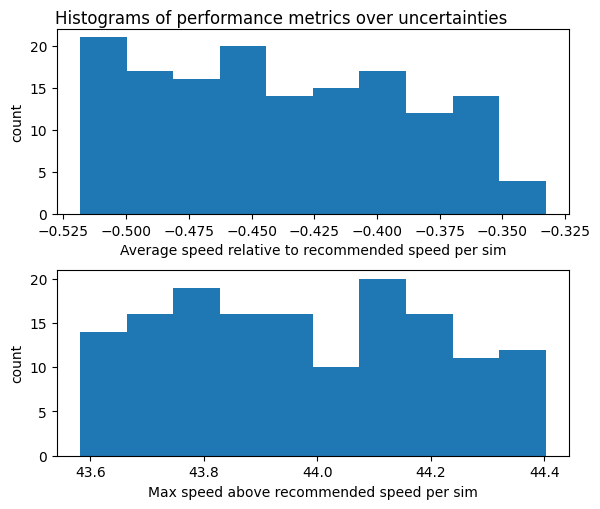

In [41]:
# Call the function to compute a single performance metric value over the simulations
pm_dict, pm_per_sim_dict = compute_performance_metrics_from_per_sim_list(pm_per_sim_list)

# Display the single values
print("Avg. speed relative to recommended speed metric over uncertainties (units: kph) = " + str(pm_dict["avg_speed_relative_to_recommended_speed_in_kph"]))
print("Max speed above recommended speed metric over uncertainties (units: kph) = " + str(pm_dict["max_speed_above_recommended_speed_in_kph"]))

# Plot a histogram
# > Open a figure
fig, axs = fig, axs = plt.subplots(2, 1, sharex=False, sharey=False, gridspec_kw={"left":0.15, "right": 0.95, "top":0.94, "bottom":0.05, "hspace":0.3})
# > Plot the histograms
axs[0].hist(pm_per_sim_dict["avg_speed_relative_to_recommended_speed_in_kph"])
axs[1].hist(pm_per_sim_dict["max_speed_above_recommended_speed_in_kph"])
# > Label the x labels
axs[0].set_xlabel("Average speed relative to recommended speed per sim")
axs[1].set_xlabel("Max speed above recommended speed per sim")
# > Label the y labels
axs[0].set_ylabel("count")
axs[1].set_ylabel("count")
# > Add an overall title
fig.suptitle("Histograms of performance metrics over uncertainties")

# Evaluate multiple policies against the performance metrics and identify the Pareto front

As it is provided, this notebook:
* Only tunes the Lane Keeping PID policy; and
* Provides some example performance metrics that are only for evaluating the cruise control policy.
* The previous 2 dot points are a purposeful choice so that you have a clear need to add aspects to this notebook that are completely missing (as opposed to only fine-tuning what is already here).

**To exemplify** comparing multiple PID policies against the performance metrics, we keep the lane keeping PID policy fixed and choose 3 values for the proportional gain of the cruise controller.

\

**WHAT TO CHANGE**

As described at the start of this notebook, you **SHOULD**:

* Define a separate road for this "final" evaluation that has the same range of features as the road used for tuning (but different values and ordering).
* Complete tuning of both the lane-keeping and cruise-control policies before editing this section.
* Be purposeful in your choice about how you synthesise multiple policies to compare, and explain the resoning for our choice.
* One example for synthesizing multiple policies, which is sufficient for the Upskilling assignment, is to:
  * Complete the tuning for a sinlge lane-keeping and cruise-control PID policy (as per the relevant sections of this notebook).
  * Generate multiple policies by perturbing the gains of the PID policies.
    * For example, evaluate all combinations of adjusting the proportional gains by {-10%, unchanged, +10%} (i.e., the 9 combination of multiplying the `kp_lk` and `kp_cc` gains by {0.9, 1.0, 1.1}).

## Specify the road for this "final" evaluation

In [42]:
road_elements_list_for_evaluation = [
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/100.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":200.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/30.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/75.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":1/40.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":50.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":-1/50.0, "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"curved", "curvature":-1/25.0,  "angle_in_degrees":90.0, "v_max_kph":80.0},
    {"type":"straight", "length":100.0, "v_max_kph":80.0},
]

Saved figure: /content/PID/eval/ad_road_evaluation.pdf


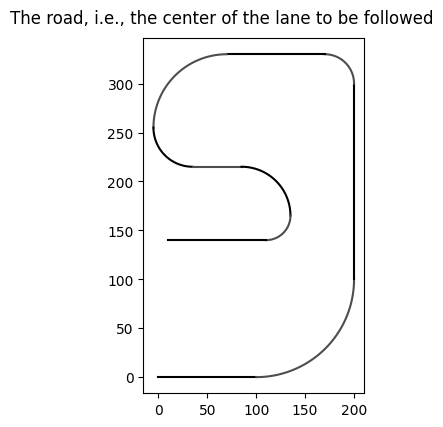

In [43]:
# Name of this road (which is used in the filename of the saved plot)
this_road_name = "evaluation"

# Call the function that plots the road
plot_details_list = plot_road_from_list_of_road_elements(road_elements_list_for_evaluation, path_for_saving_figures, this_road_name)

## Evaluate the Performance Metric for each policy

In [44]:
# Speficy the set of PID gains to evaluate
pid_gains_to_evaluate_list = [
    {"policy_name": "PID1", "kp_cc":  5.0, "ki_cc": 0.0, "kd_cc": 0.00, "kp_lk": 0.06, "ki_lk": 0.04, "kd_lk": 0.03},
    {"policy_name": "PID2", "kp_cc": 10.0, "ki_cc": 0.0, "kd_cc": 0.00, "kp_lk": 0.06, "ki_lk": 0.04, "kd_lk": 0.03},
    {"policy_name": "PID3", "kp_cc": 20.0, "ki_cc": 0.0, "kd_cc": 0.00, "kp_lk": 0.06, "ki_lk": 0.04, "kd_lk": 0.03},
]

# Initialise a list for all the "pm_per_sim_list" results
pm_per_policy_per_sim_list = []

# Initialise a list for all the performance metrics results over simulations
pm_per_policy_list = []

# Define the length of each simulation
N_sim = 5000

# Iterate over the policies
for i, pid_gain_dict in enumerate(pid_gains_to_evaluate_list, start=1):

    # Display the policy that we are about to evaluate
    print("----------------------------------------------")
    print(f"Now evaluating policy {i} of {len(pid_gains_to_evaluate_list)}, with PID gains:")
    print(pid_gain_dict)
    print("")

    # Initialize the PIDPolicy class
    pid_policy = PIDPolicy(
        kp_cc=pid_gain_dict["kp_cc"], ki_cc=pid_gain_dict["ki_cc"], kd_cc=pid_gain_dict["kd_cc"], kp_lk=pid_gain_dict["kp_lk"], ki_lk=pid_gain_dict["ki_lk"], kd_lk=pid_gain_dict["kd_lk"], Ts=numerical_integration_parameters["Ts"])

    # Specify that the "rescale action wrapper" is NOT needed (this is only needed for RL policies)
    should_use_rescale_action_wrapper = False

    # Call the function for computing the performance metrics over uncertainties
    pm_per_sim_list = performance_metrics_over_uncertainties(
        N_sim,
        pid_policy,
        should_use_rescale_action_wrapper,
        bicycle_model_parameters,
        road_elements_list_for_evaluation,
        numerical_integration_parameters,
        termination_parameters,
        initial_state_bounds,
        observation_parameters,
    )

    # Call the function for computing the performance metrics over multiple simulations
    pm_dict, pm_per_sim_dict = compute_performance_metrics_from_per_sim_list(pm_per_sim_list)

    # Append the results
    pm_per_policy_per_sim_list.append(pm_per_sim_dict)
    pm_per_policy_list.append(pm_dict)

    # Display extra line before what comes next
    print("")

----------------------------------------------
Now evaluating policy 1 of 3, with PID gains:
{'policy_name': 'PID1', 'kp_cc': 5.0, 'ki_cc': 0.0, 'kd_cc': 0.0, 'kp_lk': 0.06, 'ki_lk': 0.04, 'kd_lk': 0.03}

Now starting 150 simulations, this may take a while.
Progress indicator:
0%        50%       100%
|----|----|----|----|
|-------------------|

----------------------------------------------
Now evaluating policy 2 of 3, with PID gains:
{'policy_name': 'PID2', 'kp_cc': 10.0, 'ki_cc': 0.0, 'kd_cc': 0.0, 'kp_lk': 0.06, 'ki_lk': 0.04, 'kd_lk': 0.03}

Now starting 150 simulations, this may take a while.
Progress indicator:
0%        50%       100%
|----|----|----|----|
|-------------------|

----------------------------------------------
Now evaluating policy 3 of 3, with PID gains:
{'policy_name': 'PID3', 'kp_cc': 20.0, 'ki_cc': 0.0, 'kd_cc': 0.0, 'kp_lk': 0.06, 'ki_lk': 0.04, 'kd_lk': 0.03}

Now starting 150 simulations, this may take a while.
Progress indicator:
0%        50%       100%

## Identify the Pareto Front

The method here iterates through one policy at a time ("policy i") and checks whether any of the other policies ("policy j") dominate it. If "policy i" is not dominated by any of the other policies, then it is on the pareto front.

In [45]:
# Specify a dictionary of which direction is better for each metric
# These should be the same keys are used in the performance metric dictionaries
pm_desired_direction = {
    "avg_speed_relative_to_recommended_speed_in_kph"  :  "bigger",
    "max_speed_above_recommended_speed_in_kph"        :  "smaller",
}

# Extract the performance metric keys from the dictionary
pm_keys = pm_desired_direction.keys()

# Initialise a list for whether the policy is "dominiated" or on the "front"
policy_is_pareto_list = []

# Initialise lists for which policies something is dominated-by or dominates
policy_is_dominated_by_list = [[] for _ in range(len(pm_per_policy_list))]
policy_dominates_list       = [[] for _ in range(len(pm_per_policy_list))]

# Iterate over the policies
for i, i_pm_dict in enumerate(pm_per_policy_list, start=0):
    # Default it to be on the front
    i_policy_is_pareto = "front"

    # Iterate over the "other" polcies to check if they dominate it
    for j, j_pm_dict in enumerate(pm_per_policy_list, start=0):
        # Skip if i equals j because we don't need to compare a policy to itself
        if (i == j):
            continue
        # Default to "j dominates i"
        j_policy_dominates_i = True
        # Iterate over the keys
        for key in pm_keys:
            # Check if "j dominates i" is not true
            if (pm_desired_direction[key] == "bigger"):
                if (i_pm_dict[key] > j_pm_dict[key]):
                    j_policy_dominates_i = False
                    break
            elif (pm_desired_direction[key] == "smaller"):
                if (i_pm_dict[key] < j_pm_dict[key]):
                    j_policy_dominates_i = False
                    break

        # Update the "i_policy_is_pareto"
        if (j_policy_dominates_i):
            i_policy_is_pareto = "dominated"
            policy_is_dominated_by_list[i].append(j)
            policy_dominates_list[j].append(i)

    # Append the result for policy i
    policy_is_pareto_list.append(i_policy_is_pareto)

# Display the results
print("Policy is pareto:")
print(policy_is_pareto_list)
print("")
print("Policy is dominated by:")
print(policy_is_dominated_by_list)
print("")
print("Policy dominates:")
print(policy_dominates_list)


Policy is pareto:
['front', 'front', 'dominated']

Policy is dominated by:
[[], [], [0, 1]]

Policy dominates:
[[2], [2], []]


## Display the data nice for copy-pasting

First define functions for converting the `pm_per_policy_list` to a comma-separate display (csv) and to a latex display (tabular environment). Then call the two functions.

In [46]:
import csv, io

def csv_from_pm_list(pm_per_policy_list, column_names=None, formats=None, row_names=None, delimiter=",", lineterminator="\n"):
    # Open a CSV writer
    csv_io = io.StringIO()
    csv_writer = csv.writer(csv_io, delimiter=delimiter, lineterminator=lineterminator)
    # Write the column headers
    column_names_full = ["Policy Name"]
    if (column_names is None):
        column_names = pm_per_policy_list[0].keys()
    column_names_full.extend(column_names)
    csv_writer.writerow(column_names_full)
    # Write the data for each row
    for i_row, pm_dict in enumerate(pm_per_policy_list, start=0):
        # Get the name for this row
        if (row_names is None):
            row_full = [f"{i_row}"]
        else:
            row_full = [row_names[i_row]]
        # Get the data for this row
        if (formats is None):
            row = [str(pm_dict[c]).replace(delimiter," ").replace(lineterminator," ") for c in column_names]
        else:
            row = [format(pm_dict[c],formats[c]) for c in column_names]
        # Write this row
        row_full.extend(row)
        csv_writer.writerow(row)
    # Return the CSV writer
    return csv_io


In [47]:
def latex_from_pm_list(pm_per_policy_list, column_names=None, formats=None, row_names=None):

    def escape_for_latex(s):
        # Minimal LaTeX escaping for text
        repl = {
            '\\': r'\textbackslash{}', '&': r'\&', '%': r'\%', '$': r'\$',
            '#': r'\#', '_': r'\_', '{': r'\{', '}' : r'\}',
            '~': r'\textasciitilde{}', '^': r'\textasciicircum{}'
        }
        s = str(s)
        return ''.join(repl.get(ch, ch) for ch in s)

    # Construct the column headers
    column_names_full = ["Policy Name"]
    if (column_names is None):
        column_names = pm_per_policy_list[0].keys()
    column_names_full.extend(column_names)

    # String for column alignment
    align_str = "|" + "l|" + "c|" * (len(column_names))

    # Add Latex lines: to start the table
    lines = [
        rf"\begin{{tabular}}{{{align_str}}}",
        r"\hline",
    ]

    # Construct the header line
    columns_header_latex = r" & ".join(rf"\textbf{{{escape_for_latex(h)}}}" for h in column_names_full)

    # Add Latex lines: for the column headings
    lines.append(columns_header_latex)
    lines.append(r"\\")
    lines.append(r"\hline")

    for i_row, pm_dict in enumerate(pm_per_policy_list, start=0):
        # Get the name for this row
        if (row_names is None):
            row_name = f"{i_row+1}"
        else:
            row_name = row_names[i_row]
        # Get the data for this row
        if (formats is None):
            row_data = [str(pm_dict[c]) for c in column_names]
        else:
            row_data = [format(pm_dict[c],formats[c]) for c in column_names]
        # Construct the row line
        row_full = [rf"\textbf{{{escape_for_latex(row_name)}}}"]
        row_full.extend(row_data)
        row_full_latex =  r" & ".join(r for r in row_full)

        # Add Latex lines: for the column headings
        lines.append(row_full_latex)
        lines.append(r"\\")
        lines.append(r"\hline")

    # Add Latex lines: to end the table
    lines.append(r"\end{tabular}")

    # Join all the line together and return
    tex = "\n".join(lines)

    #if file:
    #    with open(file, "w", encoding="utf-8") as f:
    #        f.write(tex)
    return tex


In [48]:
# Specify formating for each of the Performance Metric keys
pm_formats={
    "avg_speed_relative_to_recommended_speed_in_kph"  :  ".2f",
    "max_speed_above_recommended_speed_in_kph"        :  ".2f",
}

print("Displaying \"pm_per_policy_list\" in csv and latex formats:")

# Call the function to display the Performance metrics in CSV format
print("")
print("---- COPY-PASTE WHAT FOLLOWS: CSV FORMAT ----")
csv_io = csv_from_pm_list(pm_per_policy_list, formats=pm_formats, row_names=[policy_details["policy_name"] for policy_details in pid_gains_to_evaluate_list])
print(csv_io.getvalue())
print("---- END OF COPY-PASTE ----")
print("")

# Call the function to display the Performance metrics in CSV format
print("")
print("---- COPY-PASTE WHAT FOLLOWS: LATEX FORMAT ----")
latex_string = latex_from_pm_list(pm_per_policy_list, formats=pm_formats, row_names=[policy_details["policy_name"] for policy_details in pid_gains_to_evaluate_list])
print(latex_string)
print("---- END OF COPY-PASTE ----")
print("")

Displaying "pm_per_policy_list" in csv and latex formats:

---- COPY-PASTE WHAT FOLLOWS: CSV FORMAT ----
Policy Name,avg_speed_relative_to_recommended_speed_in_kph,max_speed_above_recommended_speed_in_kph
-0.39,44.13
-0.32,44.75
-0.55,45.03

---- END OF COPY-PASTE ----


---- COPY-PASTE WHAT FOLLOWS: LATEX FORMAT ----
\begin{tabular}{|l|c|c|}
\hline
\textbf{Policy Name} & \textbf{avg\_speed\_relative\_to\_recommended\_speed\_in\_kph} & \textbf{max\_speed\_above\_recommended\_speed\_in\_kph}
\\
\hline
\textbf{PID1} & -0.39 & 44.13
\\
\hline
\textbf{PID2} & -0.32 & 44.75
\\
\hline
\textbf{PID3} & -0.55 & 45.03
\\
\hline
\end{tabular}
---- END OF COPY-PASTE ----



## Plot two Performance Metric

Plotting the Pareto front is not practical when there are more than 2 Performance Metrics.

However, if there are two Performance Metrics that respresent the "biggest" trade-off, then it can give some insights to plot just those 2.

This is just plotting any 2 Performance Metrics as an example.

Text(0.5, 0.98, 'Plot of Performance Metrics for multiple policies')

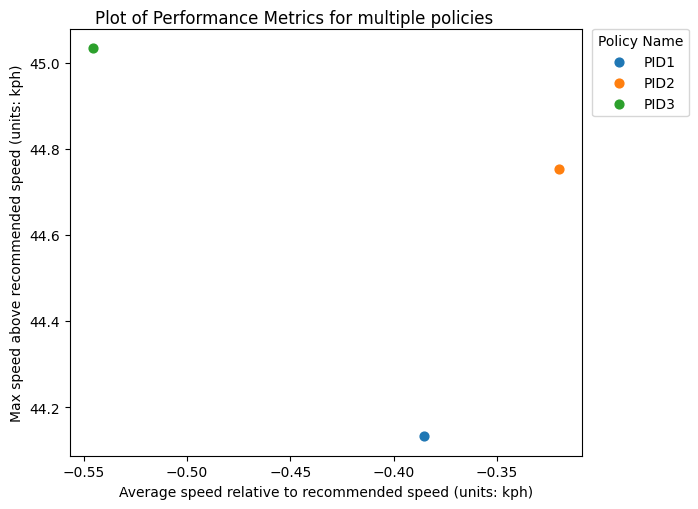

In [49]:
# Plot a histogram
# > Open a figure
fig, axs = fig, axs = plt.subplots(1, 1, sharex=False, sharey=False, gridspec_kw={"left":0.15, "right": 0.95, "top":0.94, "bottom":0.05, "hspace":0.3})
# > Specify the 2 Performance Metric keys
pm1_key = "avg_speed_relative_to_recommended_speed_in_kph"
pm2_key = "max_speed_above_recommended_speed_in_kph"
# > Plot a dot for each policy
#axs.scatter([pm[pm1_key] for pm in pm_per_policy_list], [pm[pm2_key] for pm in pm_per_policy_list])
for i, pm in enumerate(pm_per_policy_list, start=0):
    x_val = pm[pm1_key]
    y_val = pm[pm2_key]
    label = pid_gains_to_evaluate_list[i]["policy_name"]
    axs.scatter(x_val, y_val, s=40, label=label)
# > Add the legend
axs.legend(title="Policy Name", loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
# > Label the axis labels
axs.set_xlabel("Average speed relative to recommended speed (units: kph)")
axs.set_ylabel("Max speed above recommended speed (units: kph)")
# > Add an overall title
fig.suptitle("Plot of Performance Metrics for multiple policies")